### Importing Basic Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.optimizers import Adam

Using TensorFlow backend.


### Importing the Datasets

In [2]:
data=pd.read_csv("../input/musk-nonmusk/musk_csv.csv")

In [3]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
data.shape

(6598, 170)

### Data Pre-processing

In [5]:
len(data["molecule_name"].unique())

102

In [6]:
len(data["conformation_name"].unique())

6598

#### Dropping the Columns

In [7]:
data.drop(["conformation_name","ID"],inplace=True,axis=1)

In [8]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1]

In [9]:
X

array([['MUSK-211', 46, -108, ..., -50, -112, 96],
       ['MUSK-211', 41, -188, ..., -61, -136, 79],
       ['MUSK-211', 46, -194, ..., -67, -145, 39],
       ...,
       ['NON-MUSK-jp13', 44, -102, ..., -66, -144, -6],
       ['NON-MUSK-jp13', 51, -121, ..., -44, -116, 117],
       ['NON-MUSK-jp13', 51, -122, ..., -44, -115, 118]], dtype=object)

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6593    0
6594    0
6595    0
6596    0
6597    0
Name: class, Length: 6598, dtype: int64

#### Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelencoder=LabelEncoder()

In [13]:
X[:,0]=labelencoder.fit_transform(X[:, 0])

In [14]:
X

array([[0, 46, -108, ..., -50, -112, 96],
       [0, 41, -188, ..., -61, -136, 79],
       [0, 46, -194, ..., -67, -145, 39],
       ...,
       [101, 44, -102, ..., -66, -144, -6],
       [101, 51, -121, ..., -44, -116, 117],
       [101, 51, -122, ..., -44, -115, 118]], dtype=object)

#### Scaling the Data 

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [16]:
X

array([[-2.22097135, -0.24312408,  0.12255207, ..., -0.04561267,
         0.50333227,  0.5762445 ],
       [-2.22097135, -0.33702966, -0.7584422 , ..., -0.24537589,
         0.18759789,  0.39560282],
       [-2.22097135, -0.24312408, -0.82451677, ..., -0.35433764,
         0.06919749, -0.02943645],
       ...,
       [ 1.49457534, -0.28068632,  0.18862664, ..., -0.33617735,
         0.08235309, -0.50760562],
       [ 1.49457534, -0.1492185 , -0.0206095 , ...,  0.06334909,
         0.45070987,  0.79939012],
       [ 1.49457534, -0.1492185 , -0.03162193, ...,  0.06334909,
         0.46386547,  0.8100161 ]])

### Splitting the data into Training and Test Sets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.20, random_state = 0)

### Building Artificial Neural Network

In [19]:
# Initializing
classifier=Sequential()

In [20]:
#Addding layers to the Neural Network
classifier.add(Dense(units = 84, kernel_initializer = 'uniform', activation = 'relu', input_dim = 167))
classifier.add(Dense(units = 84, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [21]:
#Setting the Optimizer
opt=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [22]:
# Compile Model
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Fitting the Model
history = classifier.fit(X_train,
                         y_train,
                         validation_data = (X_test,y_test),
                         epochs=30,
                         batch_size=16)


Train on 5278 samples, validate on 1320 samples
Epoch 1/30
5278/5278 [==============================] - 1s 177us/step - loss: 0.4452 - accuracy: 0.8439 - val_loss: 0.2938 - val_accuracy: 0.8515
Epoch 2/30
5278/5278 [==============================] - 1s 112us/step - loss: 0.2341 - accuracy: 0.9007 - val_loss: 0.1744 - val_accuracy: 0.9295
Epoch 3/30
5278/5278 [==============================] - 1s 112us/step - loss: 0.1388 - accuracy: 0.9473 - val_loss: 0.1063 - val_accuracy: 0.9530
Epoch 4/30
5278/5278 [==============================] - 1s 112us/step - loss: 0.0899 - accuracy: 0.9644 - val_loss: 0.0692 - val_accuracy: 0.9742
Epoch 5/30
5278/5278 [==============================] - 1s 110us/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.0443 - val_accuracy: 0.9917
Epoch 6/30
5278/5278 [==============================] - 1s 111us/step - loss: 0.0383 - accuracy: 0.9930 - val_loss: 0.0298 - val_accuracy: 0.9924
Epoch 7/30
5278/5278 [==============================] - 1s 113us/step - loss

#### Training and Validation accuracy and Loss graph

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

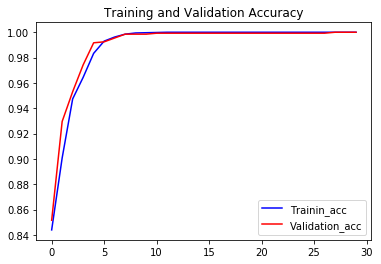

In [25]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

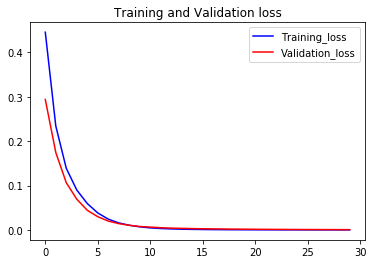

In [26]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

### making prediction on test set 

In [27]:
y_pred=classifier.predict(X_test)

In [28]:
y_pred=np.where(y_pred>0.5,1,0)

In [29]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Model Evaluation Using Confusion Matrix, accuracy_score and classification report

In [30]:
cm = confusion_matrix(y_test, y_pred)

In [31]:
print(cm)

[[1120    0]
 [   0  200]]


In [32]:
accuracy_score(y_test,y_pred)

1.0

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00       200

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



### Saving the trained Model

In [34]:
classifier.save("musk_model.h5")